# Machine Learning Model Deployment: Predict if Today is Raining or Drizzle

## Trainer Script

In [4]:
!python train.py

01:40:37 INFO:Loading dataset
01:40:37 INFO:Setting column `rain_drizzle` as target column
01:40:37 INFO:Filling missing value...
01:40:37 INFO:Performing imbalance class removal by RandomUnderSampler
01:40:37 INFO:Non used feature for this training session is: ['date', 'year', 'mo', 'da', 'avg_wind_speed_prev_1_dayavg_dew_point_prev_1_dayavg_sea_level_point_prev_1_dayavg_temp_prev_1_dayavg_temp_prev_3_dayavg_dew_point_prev_3_dayavg_sea_level_point_prev_3_day']
01:40:37 INFO:Preparing the ready to use dataset
01:40:37 INFO:Performing train test split with ratio of 60/20/20
01:40:37 INFO:Converting train/test/val feature into dictvectorizer
01:40:37 INFO:Training RandomForestClassifier Model
01:40:37 INFO:Succesfully trained model
01:40:37 INFO:Score on validation set: 0.7741750028745544
01:40:37 INFO:Score on test set: 0.7396662387676509
01:40:37 INFO:Saving model into ./model/final_model.bin
01:40:37 INFO:Saving model into ./model/final_dv.bin


## Preparing the Serving Script

In [1]:
!pip install pipenv

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 1.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 1.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 1.5 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
!~/.local/bin/pipenv install

Pipfile.lock (da1282) out of date, updating to (260cd8)...
Locking [packages] dependencies...
Building requirements...
Resolving dependencies...
✔ Success! Locking...
⠼ Locking...
Locking [dev-packages] dependencies...
Updated Pipfile.lock (c871f291dace61f965d235edb2a82b5ea6883ddd6099a2a180f64925c5260cd8)!
Installing dependencies from Pipfile.lock (260cd8)...
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.


### Taking some of the data samples

In [6]:
import pandas as pd

data = pd.read_csv("./data/gsod_jakarta_eda_and_preprocessed.csv")
data

date flag_precipitation_prev_1_day flag_precipitation_prev_2_day  \
0     2013-04-30                             I                             I   
1     2013-11-07                             I                             I   
2     2023-01-09                             B                             C   
3     2014-02-17                             I                         OTHER   
4     2023-05-15                             I                             A   
...          ...                           ...                           ...   
2851  2023-11-29                             I                             I   
2852  2023-11-30                             A                             I   
2853  2023-12-01                         OTHER                             A   
2854  2023-12-03                             I                             A   
2855  2023-12-04                         OTHER                             I   

     flag_precipitation_prev_3_day flag_precipitation_prev_4_day  \
0                                A                             I   
1                            OTHER                             I   
2                                I                             A   
3                            OTHER                             I   
4                                I                             I   
...                            ...                           ...   
2851                             I                             B   
2852                             I                             I   
2853                             I                             I   
2854                         OTHER                             A   
2855                             A                         OTHER   

     flag_precipitation_prev_5_day flag_precipitation_prev_6_day  \
0                                A                             B   
1                                I                         OTHER   
2                            OTHER                         OTHER   
3                                I                             I   
4                                I                             I   
...                            ...                           ...   
2851                             B                             I   
2852                             B                             B   
2853                             I                             B   
2854                             I                             I   
2855                             A                             I   

     flag_precipitation_prev_7_day  avg_temp_prev_1_day  avg_temp_prev_2_day  \
0                                I                 86.3                 84.3   
1                                I                 84.7                 84.5   
2                                B                 83.9                 85.7   
3                            OTHER                 81.5                 78.1   
4                                I                 85.1                 84.4   
...                            ...                  ...                  ...   
2851                             A                 85.2                 82.7   
2852                             I                 85.3                 85.2   
2853                             B                 83.0                 85.3   
2854                             I                 85.0                 79.9   
2855                             I                 83.8                 85.0   

      ...  avg_wind_speed_prev_6_day  avg_wind_speed_prev_7_day  \
0     ...                        0.5                        1.3   
1     ...                        1.0                        3.9   
2     ...                        2.7                        3.9   
3     ...                        0.0                        2.1   
4     ...                        2.0                        2.7   
...   ...                        ...                  

In [11]:
rain_or_drizzy = data[data['target'] == 1].sample(5, random_state=42).to_dict('records')
rain_or_drizzy

[{'date': '2013-11-17',
  'flag_precipitation_prev_1_day': 'OTHER',
  'flag_precipitation_prev_2_day': 'OTHER',
  'flag_precipitation_prev_3_day': 'OTHER',
  'flag_precipitation_prev_4_day': 'OTHER',
  'flag_precipitation_prev_5_day': 'OTHER',
  'flag_precipitation_prev_6_day': 'I',
  'flag_precipitation_prev_7_day': 'OTHER',
  'avg_temp_prev_1_day': 80.1,
  'avg_temp_prev_2_day': 80.7,
  'avg_temp_prev_3_day': 81.6,
  'avg_temp_prev_4_day': 79.5,
  'avg_temp_prev_5_day': 82.1,
  'avg_temp_prev_6_day': 83.6,
  'avg_temp_prev_7_day': 83.6,
  'avg_dew_point_prev_1_day': 76.3,
  'avg_dew_point_prev_2_day': 74.8,
  'avg_dew_point_prev_3_day': 75.3,
  'avg_dew_point_prev_4_day': 75.2,
  'avg_dew_point_prev_5_day': 74.8,
  'avg_dew_point_prev_6_day': 74.3,
  'avg_dew_point_prev_7_day': 75.0,
  'avg_sea_level_point_prev_1_day': 1009.2,
  'avg_sea_level_point_prev_2_day': 1009.0,
  'avg_sea_level_point_prev_3_day': 1008.7,
  'avg_sea_level_point_prev_4_day': 1008.3,
  'avg_sea_level_point_prev

In [12]:
no_rain_or_drizzy = data[data['target'] == 0].sample(5, random_state=42).to_dict('records')
no_rain_or_drizzy

[{'date': '2015-03-24',
  'flag_precipitation_prev_1_day': 'I',
  'flag_precipitation_prev_2_day': 'C',
  'flag_precipitation_prev_3_day': 'I',
  'flag_precipitation_prev_4_day': 'OTHER',
  'flag_precipitation_prev_5_day': 'A',
  'flag_precipitation_prev_6_day': 'I',
  'flag_precipitation_prev_7_day': 'A',
  'avg_temp_prev_1_day': 83.7,
  'avg_temp_prev_2_day': 81.9,
  'avg_temp_prev_3_day': 81.6,
  'avg_temp_prev_4_day': 9999.9,
  'avg_temp_prev_5_day': 82.8,
  'avg_temp_prev_6_day': 84.0,
  'avg_temp_prev_7_day': 83.6,
  'avg_dew_point_prev_1_day': 74.5,
  'avg_dew_point_prev_2_day': 73.9,
  'avg_dew_point_prev_3_day': 74.8,
  'avg_dew_point_prev_4_day': 9999.9,
  'avg_dew_point_prev_5_day': 76.1,
  'avg_dew_point_prev_6_day': 73.8,
  'avg_dew_point_prev_7_day': 75.5,
  'avg_sea_level_point_prev_1_day': 1010.6,
  'avg_sea_level_point_prev_2_day': 1011.7,
  'avg_sea_level_point_prev_3_day': 1012.0,
  'avg_sea_level_point_prev_4_day': 9999.9,
  'avg_sea_level_point_prev_5_day': 1010.7,

In [13]:
import json

sample_for_test = no_rain_or_drizzy + rain_or_drizzy
with open('./data/sample_for_predict_test.json', 'w') as fp:
    json.dump(sample_for_test, fp)


In [14]:
!python predict-test.py

{"predictions":[{"prediction_for_date":"2015-03-24","decision":true,"probability":0.515,"description":"It will be rain or drizzle during 2015-03-24. Bring your umbrella"},{"prediction_for_date":"2017-07-31","decision":false,"probability":0.275,"description":"It will be not either rain or drizzle during 2017-07-31. Have a nice day"},{"prediction_for_date":"2014-12-01","decision":true,"probability":0.51,"description":"It will be rain or drizzle during 2014-12-01. Bring your umbrella"},{"prediction_for_date":"2019-08-18","decision":false,"probability":0.153,"description":"It will be not either rain or drizzle during 2019-08-18. Have a nice day"},{"prediction_for_date":"2014-10-24","decision":false,"probability":0.34,"description":"It will be not either rain or drizzle during 2014-10-24. Have a nice day"},{"prediction_for_date":"2013-11-17","decision":true,"probability":0.746,"description":"It will be rain or drizzle during 2013-11-17. Bring your umbrella"},{"prediction_for_date":"2022-01-

In [15]:
!cat predict-test.py

import requests
import json

url = "http://localhost:8000/batch-predict/"

with open('./data/sample_for_predict_test.json', 'r') as fp:
    payload = json.load(fp)
    headers = {
        'accept': 'application/json',
        'Content-Type': 'application/json'
    }

    response = requests.request("POST", url, headers=headers, json=payload)

    print(response.text)

## Building Docker Image

In [16]:
!cat Dockerfile

FROM python:3.9.12-slim

RUN pip install pipenv

WORKDIR /app

COPY ["Pipfile", "Pipfile.lock", "./"]

# install the pipenv dependencies for the project and deploy them.
RUN pipenv install --deploy --system

# Copy any python files and the model we had to the working directory of Docker 
COPY ["predict.py", "./"]
COPY ["model/", "./model"]

# We need to expose the 8080 port because we're not able to communicate with Docker outside it
EXPOSE 8080

# If we run the Docker image, we want our app to be running
ENTRYPOINT ["uvicorn", "predict:app", "--host", "0.0.0.0", "--port", "8080"]


In [17]:
!docker build -t desenfirman/weather-raining-prediction .

[+] Building 0.0s (0/2)                                                         
[+] Building 0.2s (2/3)                                                         
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 633B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for docker.io/library/python:3.9.12-slim      0.1s
[+] Building 0.3s (2/3)                                                         
 => [internal] load build definition from Dockerfile                       0.0s
 => => transferring dockerfile: 633B                                       0.0s
 => [internal] load .dockerignore                                          0.0s
 => => transferring context: 2B                                            0.0s
 => [internal] load metadata for dock

We will run this command on the terminal to serve the model

```bash
docker run --rm --name weather-raining-prediciton -t desenfirman/weather-raining-prediction
```

And access the endpoint. In this scenario, we'll use the docker bridge IP to interact with the served model

In [18]:
import requests
import json


url = "http://172.17.0.3:8080/batch-predict" # Use Docker Bridge IP instead

with open('./data/sample_for_predict_test.json', 'r') as fp:
    payload = json.load(fp)
    headers = {
        'Content-Type': 'application/json'
    }

    response = requests.request("POST", url, headers=headers, json=payload)

    print(response.text)

{"predictions":[{"prediction_for_date":"2015-03-24","decision":true,"probability":0.515,"description":"It will be rain or drizzle during 2015-03-24. Bring your umbrella"},{"prediction_for_date":"2017-07-31","decision":false,"probability":0.275,"description":"It will be not either rain or drizzle during 2017-07-31. Have a nice day"},{"prediction_for_date":"2014-12-01","decision":true,"probability":0.51,"description":"It will be rain or drizzle during 2014-12-01. Bring your umbrella"},{"prediction_for_date":"2019-08-18","decision":false,"probability":0.153,"description":"It will be not either rain or drizzle during 2019-08-18. Have a nice day"},{"prediction_for_date":"2014-10-24","decision":false,"probability":0.34,"description":"It will be not either rain or drizzle during 2014-10-24. Have a nice day"},{"prediction_for_date":"2013-11-17","decision":true,"probability":0.746,"description":"It will be rain or drizzle during 2013-11-17. Bring your umbrella"},{"prediction_for_date":"2022-01-

## Cloud Deployment

Using Google Cloud Run to serve the model. In this scenario, Google Cloud SDK Docker version used to interract with GCP Cloud Run. During the deployment, you need to authenticate to the your GCP account.

> Some of Jupyter Notebook command is needed to run inside the CLI Shell due to requirement of interactive input

In [20]:
# !docker rm gcloud-config
!docker run -ti --name gcloud-config gcr.io/google.com/cloudsdktool/google-cloud-cli:alpine /bin/bash -c 'echo "Succesfully creating GCP cred store"'

Unable to find image 'gcr.io/google.com/cloudsdktool/google-cloud-cli:alpine' locally
alpine: Pulling from google.com/cloudsdktool/google-cloud-cli

b61bad3b: Pulling fs layer 
0faf4cdf: Pulling fs layer 
c289944f: Pulling fs layer 
990f67c4: Pulling fs layer 
c89624ba: Pulling fs layer 
235cc6ff: Pulling fs layer 
Digest: sha256:094bce528a96659a504ddfc7c69d38c6debc172a8cd44690834e976516c6f40e5A
Status: Downloaded newer image for gcr.io/google.com/cloudsdktool/google-cloud-cli:alpine
Succesfully creating GCP cred store


In [21]:
!docker run --rm --volumes-from gcloud-config -ti gcr.io/google.com/cloudsdktool/google-cloud-cli:alpine /bin/bash -c 'gcloud auth login --no-launch-browser && gcloud config set project dese-gcp'

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=iKnXlqWZgURWM4AtzCJOLTAo6jEJ3d&prompt=consent&access_type=offline&code_challenge=q90LlkblOqxXPaFAc9IrBFptYZD4KMr7CNyFyXadiS0&code_challenge_method=S256

Enter authorization code: ^C


Command killed by keyboard interrupt



In [22]:
!docker run --rm --volumes-from gcloud-config -ti gcr.io/google.com/cloudsdktool/google-cloud-cli:alpine gcloud projects list | grep dese-gcp


dese-gcp                     dese-gcp                     191258647684


The following command will setup the Google Container Registry (GCR). Tagging the related docker image using the tagging url defined by GCR. Then, Push the image to GCR. All it run and done directly from the Google SDK container 

PS: Run this command into the bash shell instead running it from Jupyter Notebook shell. Here is the screenshot of the following command

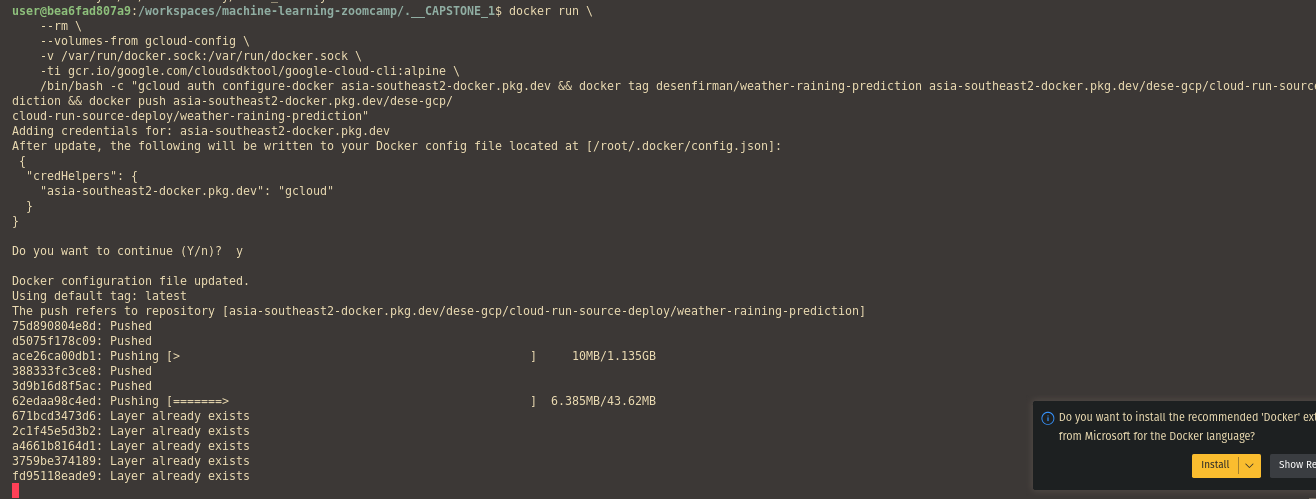

In [23]:
!docker run \
    --rm \
    --volumes-from gcloud-config \
    -v /var/run/docker.sock:/var/run/docker.sock \
    -ti gcr.io/google.com/cloudsdktool/google-cloud-cli:alpine \
    /bin/bash -c "gcloud auth configure-docker asia-southeast2-docker.pkg.dev && docker tag desenfirman/weather-raining-prediction asia-southeast2-docker.pkg.dev/dese-gcp/cloud-run-source-deploy/weather-raining-prediction && docker push asia-southeast2-docker.pkg.dev/dese-gcp/cloud-run-source-deploy/weather-raining-prediction"

Adding credentials for: asia-southeast2-docker.pkg.dev
After update, the following will be written to your Docker config file located 
at [/root/.docker/config.json]:
 {
  "credHelpers": {
    "asia-southeast2-docker.pkg.dev": "gcloud"
  }
}

Do you want to continue (Y/n)?  ^C


Command killed by keyboard interrupt



Next, this command will create a Google Cloud Run deployment using the pushed image from GCR. All of these command will be performed directly from the SDK container. 

PS: Run this command into the bash shell instead running it from Jupyter Notebook shell. Here is the screenshot of the following command

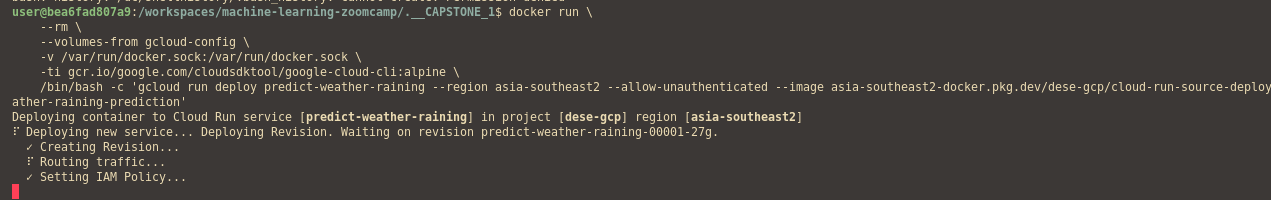

In [ ]:
!docker run \
    --rm \
    --volumes-from gcloud-config \
    -v /var/run/docker.sock:/var/run/docker.sock \
    -ti gcr.io/google.com/cloudsdktool/google-cloud-cli:alpine \
    /bin/bash -c 'gcloud run deploy predict-weather-raining --region asia-southeast2 --allow-unauthenticated --image asia-southeast2-docker.pkg.dev/dese-gcp/cloud-run-source-deploy/weather-raining-prediction'

## Test the Cloud deployment

Check the home `README.md` file